# Exploratory analysis of I-94 Interstate highway traffic data

- The goal of our analysis is to determine a few indicators of heavy westbound traffic on I-94 - a 1010-mile corridor that crosses five states Minnesota, Wisconsin, Illinois, Indiana, and Michigan. These indicators can be weather type, time of the day, time of the week, etc.

- The dataset can be found on [Kaggle](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).

Data dictionary for the dataset:
- holiday - US National holidays plus regional holiday, Minnesota State Fair
- temp - Average temp in kelvin	
- rain_1h - Amount in mm of rain that occurred in the hour
- snow_1h - Amount in mm of snow that occurred in the hour
- clouds_all - Percentage of cloud cover
- weather_main - Short textual description of the current weather
- weather_description - Longer textual description of the current weather
- date_time - Hour of the data collected in local CST time
- traffic_volume - Hourly I-94 ATR 301 reported westbound traffic volume

# Dataset overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset includes information about traffic volume, weather conditions and time of data entry. The data was recorded between 2012 and 2018. All of the data is cleaned, there are no "null" values.

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). Therefore, generalization of results for the entire highway should be avoided.

# Exploratory analysis
### Analyzing traffic volume

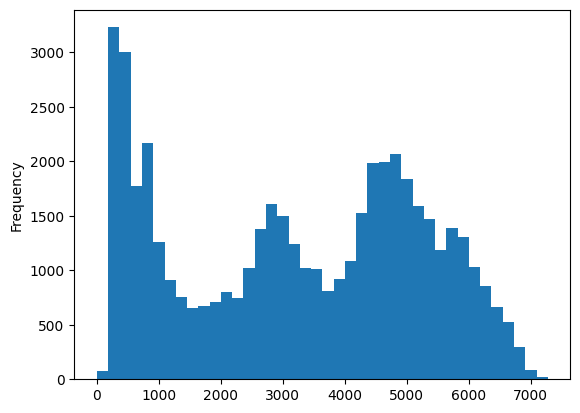

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [3]:
traffic["traffic_volume"].plot.hist(bins=40)
plt.show()

traffic["traffic_volume"].describe()

The histogram shows that about 25% of the time, 1193 cars or less passed through the station each hour and about 75% of the time, the traffic volume was 4933 cars or less. This mostlikely hints at the fact that the I-94 becomes busy during peek hours (daytime) and emptier during off-hours (nighttime). The highway rarely becomes completely empty. A deeper look into the use of the highway during the day and night hours is needed.

### Traffic Volume: Day vs. Night

We will begin by dividing the dataset into two parts: daytime data (hours from 7 a.m. to 7 p.m.) and nighttime data (7 p.m. to 7 a.m.).

In [4]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

traffic_day = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(traffic_day.shape)

traffic_night = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(traffic_night.shape)

(23877, 9)
(24327, 9)


Now let's look at the split datasets individually.

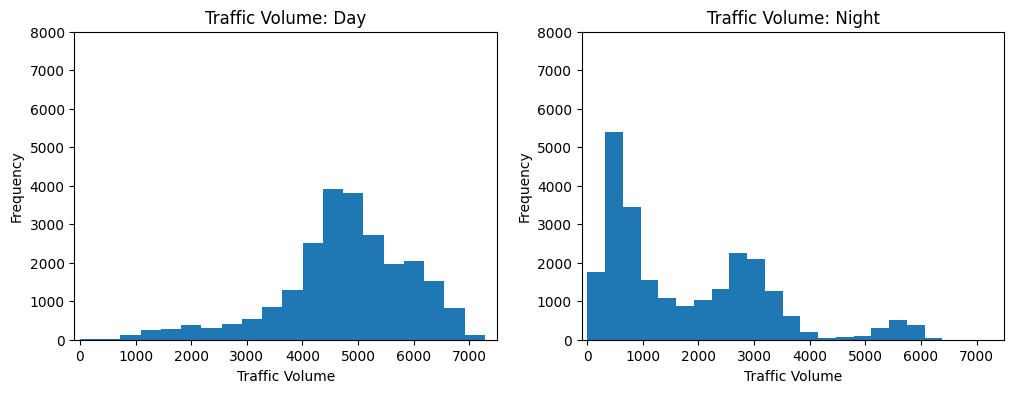

In [5]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.hist(traffic_day['traffic_volume'], bins = 20)
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(traffic_night['traffic_volume'], bins = 20)
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [6]:
print("Traffic volume: Day \n", traffic_day["traffic_volume"].describe())
print("Traffic volume: Night \n", traffic_night["traffic_volume"].describe())

Traffic volume: Day 
 count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
Traffic volume: Night 
 count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


Our graphs indicate that it is much more common for the traffic volume to be higher during the day. 75% of the time, 5559 cars or less pass the station each hour. On the other hand, during the night the traffic is relatively light - 75% of the time, around half as many cars pass the station. Of course, there are exceptions - during some night hours traffic volume can reach 6000 cars. That is likely caused by major holidays, large traffic jams, etc.

As we are looking to find indicators of heavy traffic, nighttime data should most likely be set aside.

### Time Indicators: Months

In [18]:
traffic_day.loc[:, 'month'] = traffic_day.loc[:, 'date_time'].dt.month
by_month = traffic_day.groupby('month').mean(numeric_only=True)
print(by_month['traffic_volume'])

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64


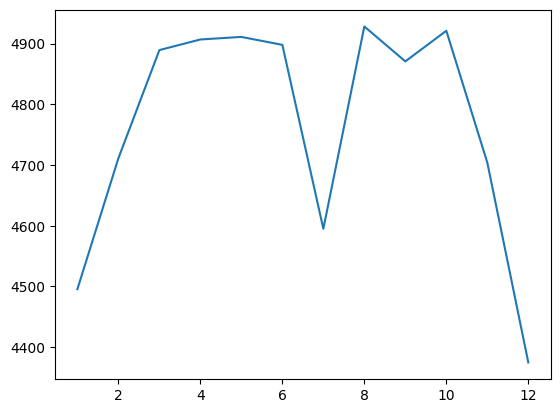

In [8]:
plt.plot(by_month['traffic_volume'])
plt.show()

The traffic looks lighter during the cold months (October-February) and heavier during the warm months (March-September). Yet, there is a clear exception - July. Let's investigate further.

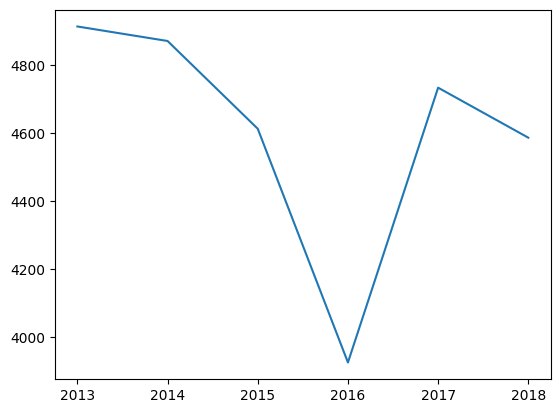

In [19]:
traffic_day.loc[:, 'year'] = traffic_day.loc[:, 'date_time'].dt.year
july_only = traffic_day.loc[traffic_day["month"]==7, :]
july_by_year = july_only.groupby('year').mean(numeric_only=True)

plt.plot(july_by_year["traffic_volume"])
plt.show()

Traffic in July is very similar to other warm months with the exception of 2016. Roads usually experiece less traffic when repairs or construction is being carried out. This seems to be the case as mentioned in this [article](https://eu.freep.com/story/news/local/michigan/wayne/2016/06/07/road-construction-on-i94/85554670/).

### Time indicators: Days of the Week

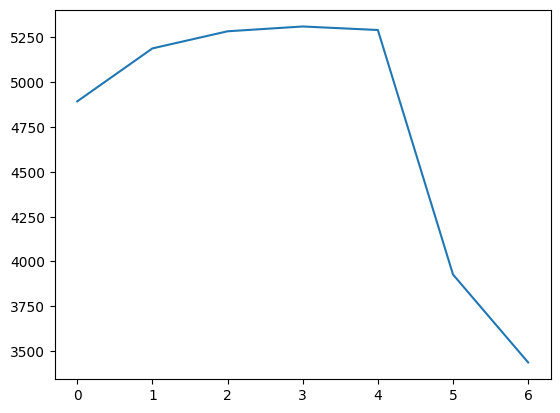

In [20]:
traffic_day.loc[:, 'dayofweek'] = traffic_day.loc[:, 'date_time'].dt.dayofweek
by_dayofweek = traffic_day.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

plt.plot(by_dayofweek['traffic_volume'])
plt.show()

Highway usage remains relatively high during workdays, but drops off quickly during the weekend as workers tend to spend the weekend at home.

### Time Indicators: Hour of Day

We'll generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [21]:
traffic_day.loc[:, 'hour'] = traffic_day.loc[:, 'date_time'].dt.hour
bussiness_days = traffic_day[traffic_day['dayofweek'] <= 4] # 4 == Friday
weekend = traffic_day[traffic_day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


Now let's plot traffic volume for hours during business days and weekend separately.

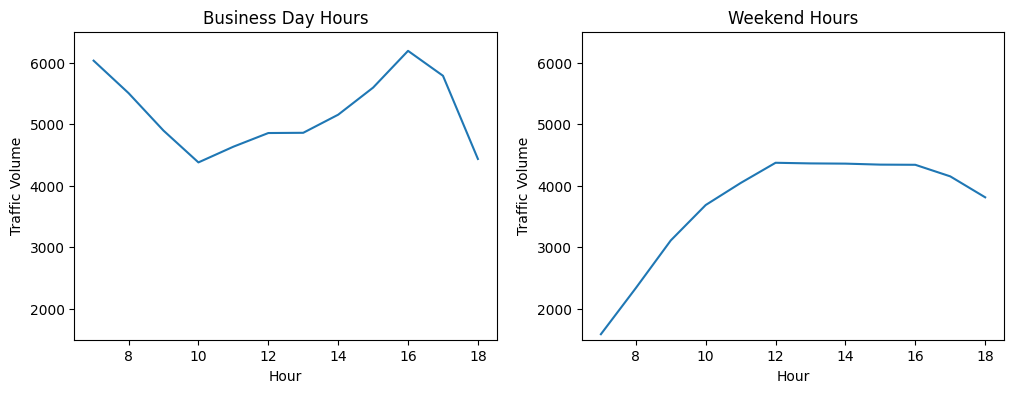

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.ylim(1500, 6500)
plt.title('Business Day Hours')
plt.ylabel('Traffic Volume')
plt.xlabel('Hour')

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.ylim(1500, 6500)
plt.title('Weekend Hours')
plt.ylabel('Traffic Volume')
plt.xlabel('Hour')

plt.show()

High traffic volume at 7 a.m. and 4 p.m. on business days indicates rush hours. From 10 a.m. to 4 p.m., the highway gradually fills up with cars. After that, the number of cars on the road suddenly decreases. Therefore, you will find the least traffic if you use the highway on regular working days between 10 a.m. and 6 p.m.

On the weekends we can see that the traffic volume gradually builds up until 12 a.m. and more or less platoes as less people are using the interstate.

To summarise the results, here are the findings about time indicators for heavy trafic:

- The traffic is lighter during the cold months (October-February) and heavier during the warm months (March-September).
- I-94 usage is high during business days but quickly drops off during the weekend.
- On business days, the rush hours are around 7 am. and 4 pm.

### Weather

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [13]:
corr_data = traffic_day.corr(numeric_only=True).loc["traffic_volume", ["temp", "rain_1h", "snow_1h", "clouds_all"]]

print(corr_data)

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64


The correlation between traffic volume and temperature seems to be the greatest so we'll plot this data.

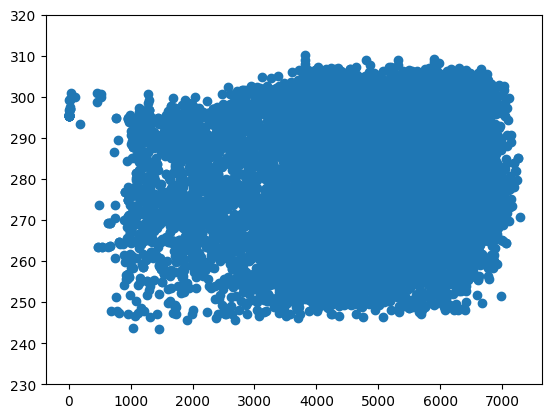

In [14]:
plt.scatter(data = traffic_day,
               x = "traffic_volume", y = "temp")
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

The scatterplot does not show a clear relation between traffic volume and temperature. As it turns out, none of the temperature related variables are reliable indicators for heavy traffic.

### Weather types

The dataset also tracked the type of weather condition at a given hour. Specifically,  column "weather_main" privides a category and "weather_description" gives a more detailed description. Let's see if weather plays a role in traffic. We'll start by grouping data entries by the columns that describe the weather.

In [15]:
by_weather_main = traffic_day.groupby('weather_main').mean(numeric_only=True)
print(by_weather_main.shape)

by_weather_description = traffic_day.groupby('weather_description').mean(numeric_only=True)
print(by_weather_description.shape)

(11, 9)
(38, 9)


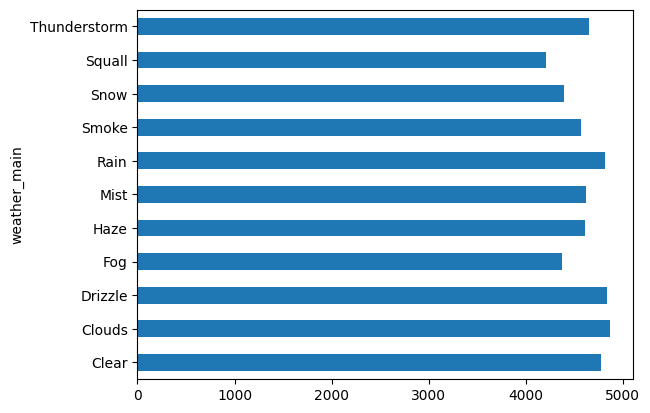

In [16]:
by_weather_main["traffic_volume"].plot.barh()
plt.show()

No single weather condition exceeds traffic volume over 5000 cars. Squall, snow and fog seem to have a slight effect on traffic volume although it is quite negligible.

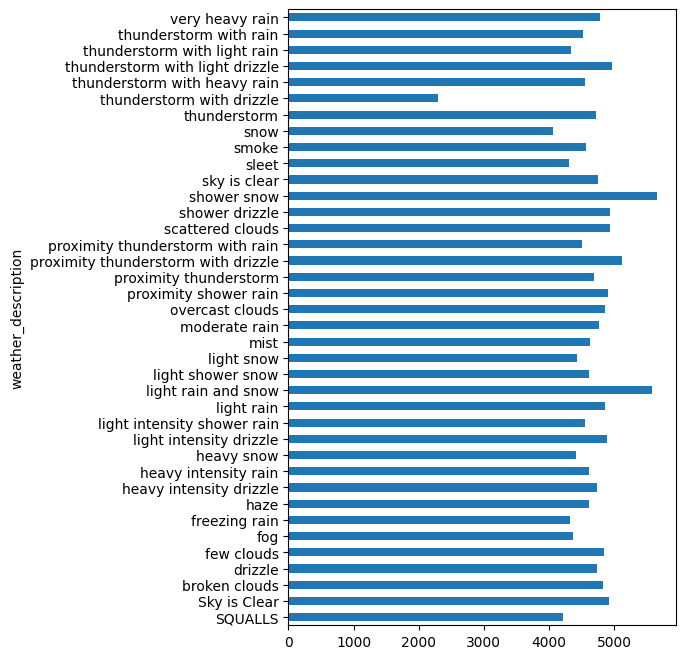

In [17]:
by_weather_description["traffic_volume"].plot.barh(figsize=(5,8))
plt.show()

There are three heavy traffic indicators that exceed 5000 cars: shower snow, light rain and snow and proximity thunderstorm with drizzle. All of these weather conditions worsen the visibility and increase the risk of incidents. Therefore, drivers are more likely to choose to drive at slower speeds which impacts traffic throughput.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

##### Time indicators
- The traffic is lighter during the cold months (October-February) and heavier during the warm months (March-September).
- I-94 usage is high during business days but quickly drops off during the weekend.
- On business days, the rush hours are around 7 am. and 4 pm.

##### Weather indicators
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle
